## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [52]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [54]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

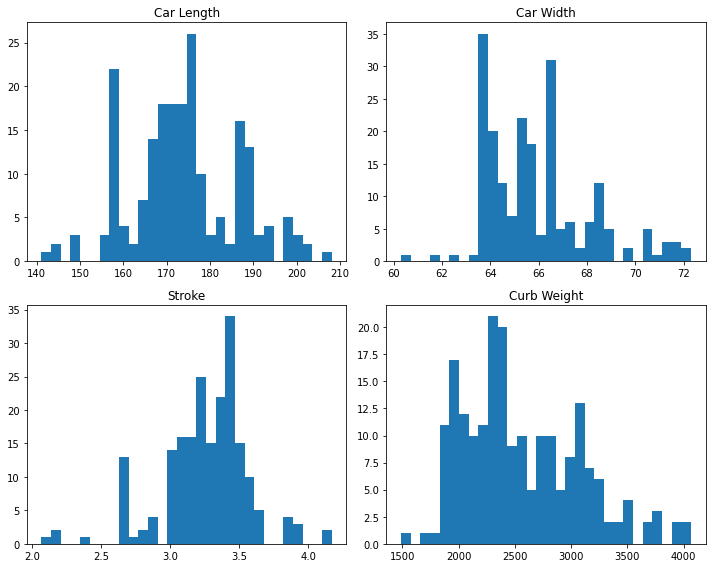

In [55]:
# Plot a histogram for each feature
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].hist(car_price_df['carlength'], bins=30)
ax[0, 0].set_title('Car Length')

ax[0, 1].hist(car_price_df['carwidth'], bins=30)
ax[0, 1].set_title('Car Width')

ax[1, 0].hist(car_price_df['stroke'], bins=30)
ax[1, 0].set_title('Stroke')

ax[1, 1].hist(car_price_df['curbweight'], bins=30)
ax[1, 1].set_title('Curb Weight')

plt.tight_layout()
plt.show()

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


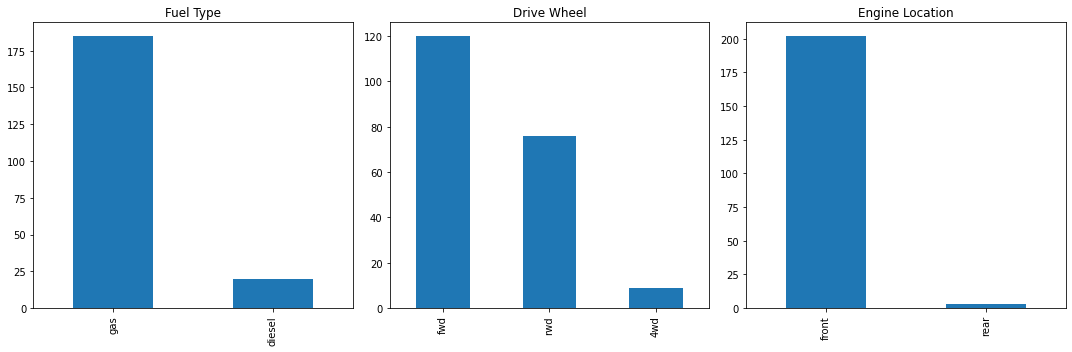

In [56]:
# Plot a bar chart for each categorical variable
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
car_price_df['fueltype'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Fuel Type')

car_price_df['drivewheel'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Drive Wheel')

car_price_df['enginelocation'].value_counts().plot.bar(ax=ax[2])
ax[2].set_title('Engine Location')

plt.tight_layout()
plt.show()

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

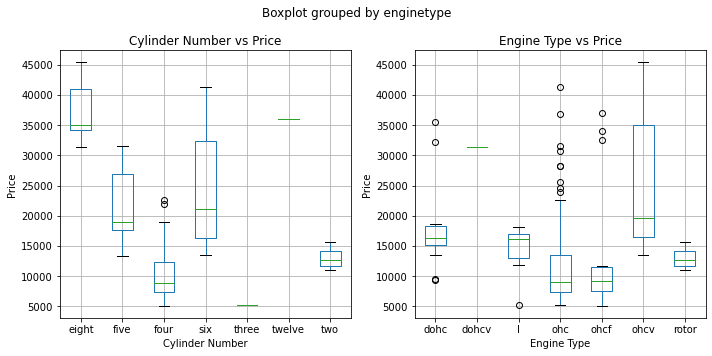

In [57]:
car_price_df['cylindernumber'] = car_price_df['cylindernumber'].astype('category')
car_price_df.sort_values('cylindernumber', inplace=True)

# Plot a boxplot for each feature
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
car_price_df.boxplot(column='price', by='cylindernumber', ax=ax[0])
ax[0].set_title('Cylinder Number vs Price')
ax[0].set_xlabel('Cylinder Number')
ax[0].set_ylabel('Price')

car_price_df.boxplot(column='price', by='enginetype', ax=ax[1])
ax[1].set_title('Engine Type vs Price')
ax[1].set_xlabel('Engine Type')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>


The histograms shows the distribution is negatively skewed which all the data point are skewed toward the left except curbweight. Furthermore, the bar charts shows the majority of car tend to use gas, fwd, and front engine. THe boxplot infers that there is not a serious relationship between the price and ( Cylinder number or Engine Type ). However, the more Cylinder number will tend to be a higher price in general. 

------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
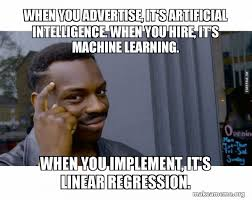



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [58]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon =  np.random.normal(0, 4, 100)
y = 7 * X - 8 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

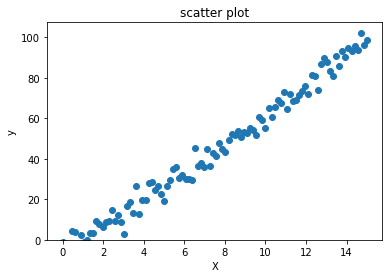

In [59]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("scatter plot")
plt.ylim(bottom = 0)
plt.show()


There is a linear relationship between x and y

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [60]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

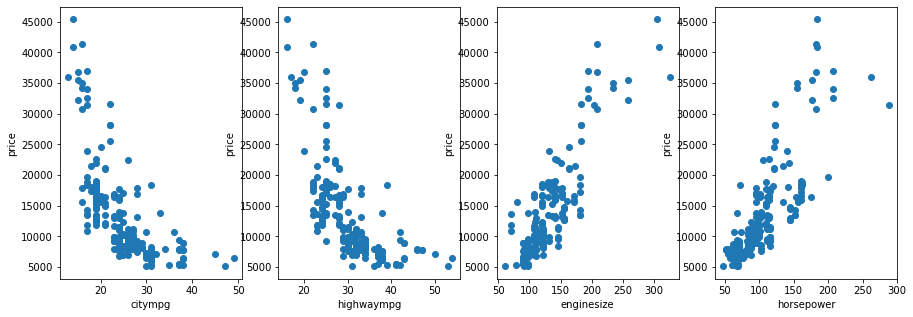

In [61]:
features = ['citympg', 'highwaympg', 'enginesize', 'horsepower']
label = 'price'


fig, axs = plt.subplots(1, len(features), figsize=(15, 5))
for i, feature in enumerate(features):
    axs[i].scatter(car_price_df[feature], car_price_df[label])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(label)

# Show plot
plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

#### Comment 
I don't think linear regression is a good model for this problem. Since there are continuous variables,  it does not perform well on discrete data.  Also, this is clear that the graph is discrete and there is no linear like the previous one. 

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [62]:
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.350,8.0,184,4500,14,16,45400.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.110,10.0,288,5750,17,28,31400.5
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.100,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.100,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.350,8.0,184,4500,14,16,40960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.760,11.5,262,5000,13,17,36000.0
55,56,3,mazda 626,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
58,59,3,mazda glc 4,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0
56,57,3,mazda glc,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0


In [63]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [64]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder 

In [65]:
import pandas as pd
import category_encoders as ce

# load the CarPrice dataset
df = pd.read_csv("car_price.csv")

# select the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# separate the target column
y = df['price']
# initialize the TargetEncoder
te = ce.TargetEncoder(cols=categorical_cols)

# fit the TargetEncoder on the categorical columns
te.fit(df, y)

# transform the categorical columns
df_encoded = te.transform(df)
df = df_encoded

In [66]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,13305.111875,12999.798219,12611.271082,12990.185355,14980.656900,19886.367600,12961.097365,88.6,...,130,17751.867388,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,13696.087841,12999.798219,12611.271082,12990.185355,14980.656900,19886.367600,12961.097365,88.6,...,130,17751.867388,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,13696.087841,12999.798219,12611.271082,12990.185355,10396.062043,19886.367600,12961.097365,94.5,...,152,17751.867388,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,13364.311231,12999.798219,12611.271082,13501.135375,14343.736839,9239.491623,12961.097365,99.8,...,109,17751.867388,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,13887.136759,12999.798219,12611.271082,13501.135375,14343.736839,12729.968114,12961.097365,99.4,...,136,17751.867388,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,13505.912022,12999.798219,12611.271082,13501.135375,14343.736839,19886.367600,12961.097365,109.1,...,141,17751.867388,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,13695.637821,12999.798219,15831.456657,13501.135375,14343.736839,19886.367600,12961.097365,109.1,...,141,17751.867388,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,14050.974739,12999.798219,12611.271082,13501.135375,14343.736839,19886.367600,12961.097365,109.1,...,173,17751.867388,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,14472.835433,14557.430285,15831.456657,13501.135375,14343.736839,19886.367600,12961.097365,109.1,...,145,14557.430285,3.01,3.40,23.0,106,4800,26,27,22470.0


**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

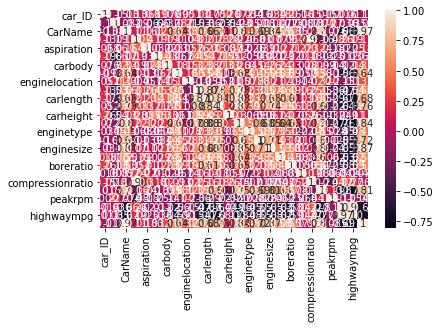

In [67]:

# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

In [68]:
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= 0.9:
            colname = corr.columns[i]
            correlated_features.add(colname)

df = df.drop(correlated_features, axis=1)

#### Comment 
Drop those column can avoid the overfitting and poor performances on thess data which cause the author hard to explain the importance of each feature. 

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [69]:
df = df.drop('car_ID', axis=1)

In [70]:
car_price_X = df
car_price_y = y.tolist()

In [71]:
car_price_X_dev,car_price_X_test, car_price_y_dev, car_price_y_test = train_test_split(car_price_X, car_price_y, test_size=0.2, random_state=0)

In [72]:
 car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(car_price_X_dev, car_price_y_dev, test_size=0.25, random_state=0)

**2.1.8 Standardize the columns in the feature matrices.**

In [73]:
scaler = StandardScaler()
car_price_X_train = scaler.fit_transform(car_price_X_train)   # Fit and transform scalar on X_train
car_price_X_val = scaler.transform(car_price_X_val)           # Transform X_val
car_price_X_test = scaler.transform(car_price_X_test)         # Transform X_test

In [74]:
print(car_price_X_train[:5], '\n\n', car_price_y_train[:5])

[[ 0.17546752 -0.3828122  -0.372678   -0.49236596 -1.25        0.71416478
  -0.78493317 -0.12856487 -0.40974726 -0.46851364 -0.00339972 -1.15016334
  -0.55669184 -0.5074834  -0.52403304 -0.43428753 -1.28892505 -0.66854906
   1.03549495 -0.09942571  0.83916558  0.00909065]
 [ 0.17546752  1.35737157 -0.372678   -0.49236596  0.8         0.71416478
   1.34658309 -0.12856487  0.75843946  1.19517538  0.41476539  0.71966069
   0.89378352 -0.5074834   2.36746136  0.82259167  1.00439665 -0.08766405
  -0.25186264  0.44932771 -1.77525606 -0.78958775]
 [-1.48472517  0.6702315  -0.372678    2.0310096   0.8        -0.18993655
   1.34658309 -0.12856487  0.89194651  1.17845488  0.55415375  1.43576351
   1.08794163 -0.5074834  -0.52403304  0.03122329  1.00439665  1.03780065
  -0.38389932  1.52070343  0.00255066 -1.26879479]
 [-0.65462882 -0.60920741 -0.372678   -0.49236596  0.8         0.71416478
  -0.78493317 -0.12856487 -0.02591448  0.25882779  0.22891423  0.64009371
  -0.33398106 -0.5074834  -0.5240

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [75]:
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

In [76]:
print(car_price_X_train[:5], '\n\n', car_price_y_train[:5])

[[ 1.          0.17546752 -0.3828122  -0.372678   -0.49236596 -1.25
   0.71416478 -0.78493317 -0.12856487 -0.40974726 -0.46851364 -0.00339972
  -1.15016334 -0.55669184 -0.5074834  -0.52403304 -0.43428753 -1.28892505
  -0.66854906  1.03549495 -0.09942571  0.83916558  0.00909065]
 [ 1.          0.17546752  1.35737157 -0.372678   -0.49236596  0.8
   0.71416478  1.34658309 -0.12856487  0.75843946  1.19517538  0.41476539
   0.71966069  0.89378352 -0.5074834   2.36746136  0.82259167  1.00439665
  -0.08766405 -0.25186264  0.44932771 -1.77525606 -0.78958775]
 [ 1.         -1.48472517  0.6702315  -0.372678    2.0310096   0.8
  -0.18993655  1.34658309 -0.12856487  0.89194651  1.17845488  0.55415375
   1.43576351  1.08794163 -0.5074834  -0.52403304  0.03122329  1.00439665
   1.03780065 -0.38389932  1.52070343  0.00255066 -1.26879479]
 [ 1.         -0.65462882 -0.60920741 -0.372678   -0.49236596  0.8
   0.71416478 -0.78493317 -0.12856487 -0.02591448  0.25882779  0.22891423
   0.64009371 -0.3339810

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [77]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None
    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        m, n = X.shape
        I = np.identity(n)
        XTX = np.dot(X.T, X)
        self.w = np.dot(np.linalg.inv(XTX + self.alpha * I), np.dot(X.T, y))
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        return np.dot(X, self.w)

### Train, Evaluate, and Interpret LR Model

2.1.11 Using your LinearRegression implementation above, train a vanilla linear regression model (
) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.

In [78]:
from sklearn.metrics import mean_squared_error
test = LinearRegression()
test.train(X_train, y_train)

arr_test = test.predict(X_test)

In [79]:
print("First 3 predictions:")
for i in range(3):
    print("Prediction: {:.2f}, Actual label: {:.2f}".format(arr_test[i], y_test[i]))

print("\nLast 3 predictions:")
for i in range(len(arr_test) - 3, len(arr_test)):
    print("Prediction: {:.2f}, Actual label: {:.2f}".format(arr_test[i], y_test[i]))

First 3 predictions:
Prediction: 19.80, Actual label: 19.76
Prediction: 82.65, Actual label: 87.93
Prediction: -5.35, Actual label: -1.96

Last 3 predictions:
Prediction: 17.70, Actual label: 26.53
Prediction: 27.13, Actual label: 19.08
Prediction: 0.94, Actual label: 0.07


**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

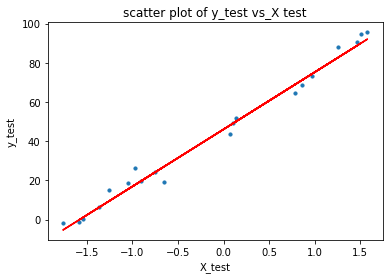

In [80]:
# Your code here
plt.scatter(X_test[:,1],y_test,s=10)
plt.plot(X_test[:,1],arr_test,'-r',label = 'predict line')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("scatter plot of y_test vs_X test")
plt.show()

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [81]:
lr = LinearRegression()
lr.train(car_price_X_train, car_price_y_train)
arr_train = lr.predict(car_price_X_train)
mse_X_train = mean_squared_error(arr_train,car_price_y_train)
r2_score = 1 - mse_X_train / np.var(car_price_y_train)
print("R^2 score: ", r2_score)

arr_val = lr.predict(car_price_X_val)
mse_X_val = mean_squared_error(arr_val,car_price_y_val)
r2_score = 1 - mse_X_val / np.var(car_price_y_val)
print("R^2 score: ", r2_score)

arr_test = lr.predict(car_price_X_test)
mse_X_test = mean_squared_error(arr_test,car_price_y_test)
r2_score = 1 - mse_X_test / np.var(car_price_y_test)
print("R^2 score: ", r2_score)

R^2 score:  0.968994440621224
R^2 score:  0.9590281729605258
R^2 score:  0.9591901832475163


In [82]:
arr = lr.predict(car_price_X_test)
print("First 3 predictions:")
for i in range(3):
    print("Prediction: {:.2f}, Actual label: {:.2f}".format(arr[i], car_price_y_test[i]))

print("\nLast 3 predictions:")
for i in range(len(arr) - 3, len(arr)):
    print("Prediction: {:.2f}, Actual label: {:.2f}".format(arr[i], car_price_y_test[i]))

First 3 predictions:
Prediction: 6171.40, Actual label: 6795.00
Prediction: 17553.04, Actual label: 15750.00
Prediction: 15426.66, Actual label: 15250.00

Last 3 predictions:
Prediction: 6123.33, Actual label: 6377.00
Prediction: 42291.41, Actual label: 45400.00
Prediction: 8686.45, Actual label: 8916.50


**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [83]:
import numpy as np
from sklearn.metrics import r2_score

class MeanBaseline:
    def __init__(self):
        self.mean = None

    def train(self, y_train):
        self.mean = np.mean(y_train)
        
    def predict(self, X):
        return np.full(X.shape[0], self.mean)
    

baseline = MeanBaseline()

baseline.train(car_price_y_train)


y_train_pred = baseline.predict(car_price_X_train)
y_val_pred = baseline.predict(car_price_X_val)
y_test_pred = baseline.predict(car_price_X_test)

r2_train = r2_score(car_price_y_train, y_train_pred)
print("R^2 on the training set:", r2_train)

r2_val = r2_score(car_price_y_val, y_val_pred)
print("R^2 on the validation set:", r2_val)

r2_test = r2_score(car_price_y_test, y_test_pred)
print("R^2 on the test set:", r2_test)


R^2 on the training set: 0.0
R^2 on the validation set: -0.04252409813108615
R^2 on the test set: -0.0028042246944892657


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

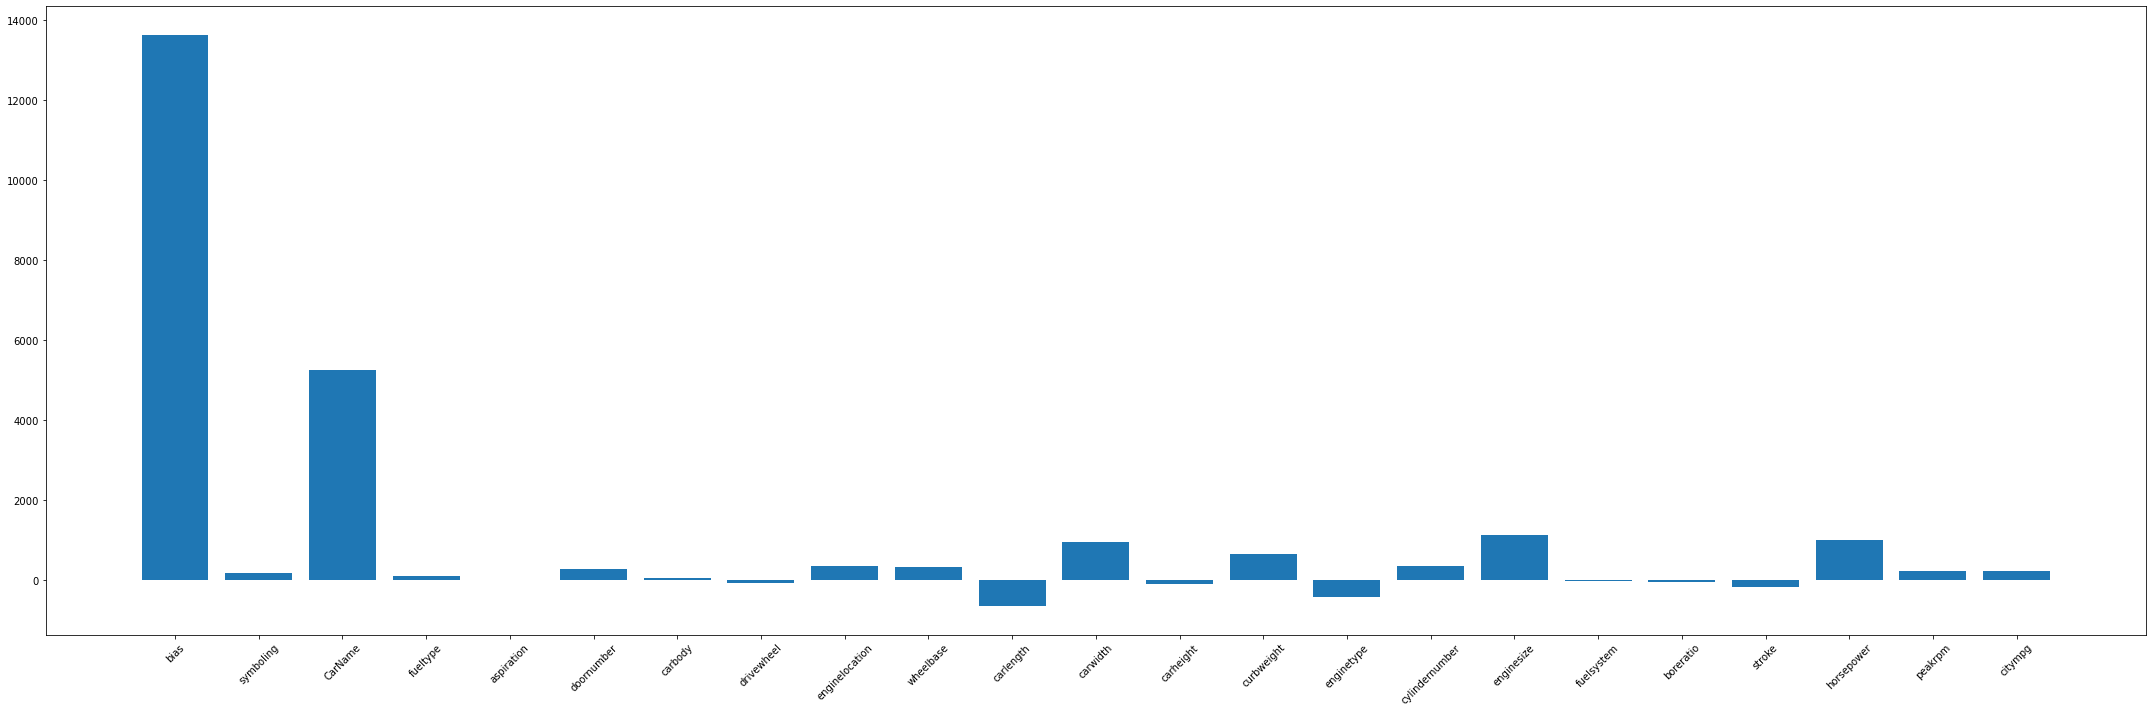

In [84]:
plt.figure(figsize=(30, 10))
label = car_price_X.columns.tolist()
label.insert(0,"bias")
plt.bar(label,lr.w)
plt.xticks(rotation=45)

# Use tight_layout to adjust subplot parameters
plt.tight_layout()
plt.show()

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

The CarName, engine  size, and horsepower are the main contributor towards the car price. 

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

In [85]:
# Your code here
train_r = []
val_r = []
alphas = np.logspace(-5, 1, 20)
i=0
for alpha in alphas:
    lr = LinearRegression(alpha = alpha)
    lr.train(car_price_X_train, car_price_y_train)
    lr_train = lr.predict(car_price_X_train)
    r2_lr= r2_score(lr_train,car_price_y_train)
    lr_val = lr.predict(car_price_X_val)
    r2_val= r2_score(lr_val,car_price_y_val)
    train_r.append(r2_lr)
    val_r.append(r2_val)

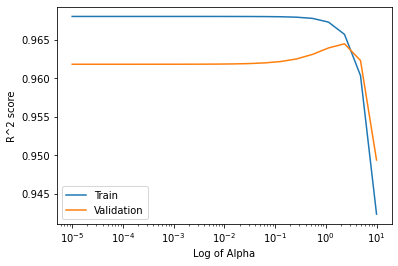

In [86]:
plt.plot(alphas, train_r, label = "Train")
plt.plot(alphas, val_r, label = "Validation")
plt.xscale('log')
plt.xlabel("Log of Alpha")
plt.ylabel("R^2 score")
plt.legend()

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

The training R^2 score and validate R^2 score have similar pattern, and training R^2 score is greater than validation
R^2 score by 0.005.
The R^2 score remains the same level, but decreases largely when alpha is 10^0.

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [87]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [88]:
# Your code here 
print("Check if there are any null values:")
print(heart_disease_df.isnull().any())
print("There are "+ str(heart_disease_df.isnull().sum().sum())+" missing values. We can drop the rows since there are 1340 samples.")

Check if there are any null values:
male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool
There are 645 missing values. We can drop the rows since there are 1340 samples.


There are around 600 missing values. We need to drop them. 

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

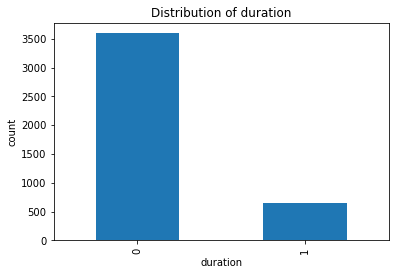

In [89]:
# Your code here
dist = heart_disease_df.groupby(by="TenYearCHD").size()
dist.plot.bar()
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Distribution of duration")
plt.show()

In [90]:
print("The probability has disease is "+ str(np.round(100*dist[1]/(dist[0]+dist[1]),2)) +" %")

The probability has disease is 15.2 %


In [91]:
print("The probability has no disease is "+ str(np.round(100*dist[0]/(dist[0]+dist[1]),2)) +" %")

The probability has no disease is 84.8 %


Since there is not around 50 percent for each category, it is not balanced. 

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [92]:
heart_disease_df = pd.read_csv('heart_disease.csv')

In [93]:
heart_disease_df.replace([np.inf, -np.inf], np.nan)

heart_disease_df.dropna(inplace=True)

In [94]:
heart_disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


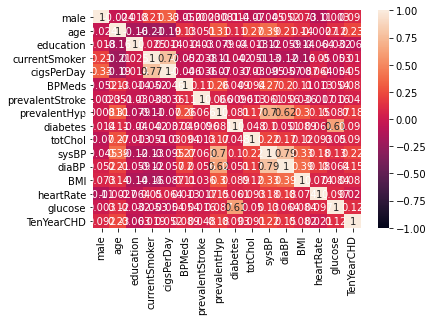

In [95]:
corr = heart_disease_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.show()

In [96]:
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= 0.9:
            colname = corr.columns[i]
            correlated_features.add(colname)
heart_disease_df = heart_disease_df.drop(correlated_features, axis=1)

In [97]:
heart_disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


 they can lead to overfitting By removing highly correlated features, we can reduce overfitting, improve model performance, and increase the stability and interpretability of the model.

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [98]:
heart_disease_X = heart_disease_df.drop(columns=['TenYearCHD'])
heart_disease_Y =  heart_disease_df['TenYearCHD'].tolist()

In [99]:
# Your code here
# 2
label = np.array(heart_disease_df.columns)

# 3
heart_disease_X_dev, heart_disease_X_test, heart_disease_y_dev, heart_disease_y_test = train_test_split(heart_disease_X, heart_disease_Y, test_size=0.2, random_state=0)
heart_disease_X_train, heart_disease_X_val, heart_disease_y_train, heart_disease_y_val = train_test_split(heart_disease_X_dev, heart_disease_y_dev, test_size=0.25, random_state=0)

#4
scaler = StandardScaler()
heart_disease_X_train = scaler.fit_transform(heart_disease_X_train)   # Fit and transform scalar on X_train
heart_disease_X_val = scaler.transform(heart_disease_X_val)           # Transform X_val
heart_disease_X_test = scaler.transform(heart_disease_X_test)

#5
heart_disease_X_train = np.hstack([np.ones((heart_disease_X_train.shape[0], 1)), heart_disease_X_train])
heart_disease_X_val = np.hstack([np.ones((heart_disease_X_val.shape[0], 1)), heart_disease_X_val])
heart_disease_X_test = np.hstack([np.ones((heart_disease_X_test.shape[0], 1)), heart_disease_X_test])

print(heart_disease_X_train[:5], '\n\n', heart_disease_y_train[:5])

[[ 1.          1.10947093  1.4718344  -0.96232538 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.60079213  0.12520652
  -0.24664238  0.51694627 -2.15100438 -0.07698024]
 [ 1.         -0.90133051 -1.12062745  0.00308155  1.04334626  0.10455836
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.49865133 -0.89891325
  -0.54085384  0.33957544 -0.07171784 -0.20135476]
 [ 1.         -0.90133051 -0.76710993  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.62322976 -0.05685922
  -0.16258197 -0.44627585  2.00756869  0.50343415]
 [ 1.          1.10947093 -0.64927075  0.96848849  1.04334626  1.20898754
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.75785549 -0.78512217
  -0.58288404 -0.41425056  0.34413946 -0.20135476]
 [ 1.         -0.90133051 -1.59198415  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.65571468 -1.14925364
  -0.79303508 -1.04736587 -0.07171784 -0.36718744]] 

 [

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [100]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

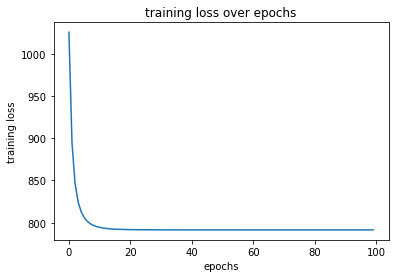

In [101]:
# Your code here 
# Part A
Log_Reg = LogisticRegression()
loss = Log_Reg.train(heart_disease_X_train, np.array(heart_disease_y_train).reshape(-1,1))
vector = np.zeros(len(loss))
for i in range(len(loss)):
    vector[i] = loss[i][0]
plt.plot(vector)
plt.xlabel("epochs")
plt.ylabel("training loss")
plt.title("training loss over epochs")
plt.show()

In [102]:
from sklearn.metrics import accuracy_score

In [105]:
# Part B and C
import random
alphas = np.linspace(0.001,0.9,20)
ts = np.arange(1,80,4)
etas = np.linspace(0.00001,0.001,20)
best_score = 0
for i in range(20):
    Log_Reg_i = LogisticRegression(alpha=alphas[i], t=ts[i], eta=etas[i])
    Log_Reg_i.train(heart_disease_X_train, np.array(heart_disease_y_train).reshape(len(heart_disease_X_train),1))
    score = accuracy_score(Log_Reg_i.predict(heart_disease_X_val),heart_disease_y_val)
    if score>best_score: 
        best_alpha = random.random() 
        best_t = random.randint(0, 100)
        best_eta = random.random()*0.0001
Log_Reg_best = LogisticRegression(alpha=best_alpha, t=best_t, eta=best_eta)
Log_Reg_best.train(heart_disease_X_train, np.array(heart_disease_y_train).reshape(len(heart_disease_X_train),1))
best_score = accuracy_score(Log_Reg_best.predict(heart_disease_X_test),heart_disease_y_test)

In [108]:
print("The best data are alpha = "+ str(best_alpha) +", t = " + str(best_t) 
      + ", and eta = " + str(best_eta) +". The score is "+ str(best_score)+".")

The best data are alpha = 0.1756994835505542, t = 80, and eta = 1.0648785254087456e-05. The score is 0.8442622950819673.


In [107]:
# C. Compare accuracy on the test dataset for both the scenarios.
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(Log_Reg.predict(heart_disease_X_test),heart_disease_y_test)
accuracy2 = accuracy_score(Log_Reg_best.predict(heart_disease_X_test),heart_disease_y_test)
print("Scenario 1: ", accuracy1)
print("Scenario 2: ", accuracy2)
print("The score received in Part A is 0.8538251366120219. The performance in Part B perform worse than Part A.")

Scenario 1:  0.8538251366120219
Scenario 2:  0.8442622950819673
The score received in Part A is 0.8538251366120219. The performance in Part B perform worse than Part A.


**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

Yes, I do. If the class distribution is imbalanced, it can affect the performance of the model. In an imbalanced class distribution, the majority class dominates the training data and the model tends to be biased towards the majority class.

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [23]:
heart_disease_df = pd.read_csv('heart_disease.csv')

In [24]:
heart_disease_df.replace([np.inf, -np.inf], np.nan)

heart_disease_df.dropna(inplace=True)

In [25]:
heart_disease_df.replace([np.inf, -np.inf], np.nan)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [26]:
heart_disease_X = heart_disease_df.drop(columns=['TenYearCHD'])
heart_disease_Y =  heart_disease_df['TenYearCHD'].tolist()

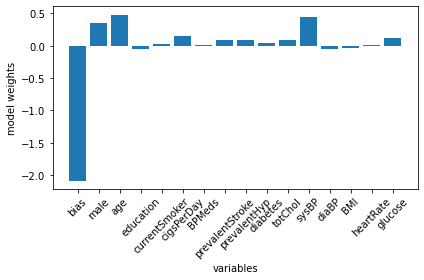

In [27]:
# Your code here
# plt.figure(figsize=(30, 10))

label_nba = heart_disease_X.columns.tolist()
label_nba.insert(0,"bias")
w = []
for i in range(len(Log_Reg.w)):
    w.append(float(Log_Reg.w[i]))
plt.bar(label_nba, w)
plt.xlabel("variables")
plt.ylabel("model weights")
plt.xticks(rotation=45)
plt.tight_layout()
# Show plot
plt.show()


Male, age ,and SYSBP are the greatest contributors to determine whether the person will get the heart disease or not 
and education have a negative impact.


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

In [5]:
heart_disease_df = pd.read_csv('heart_disease.csv')

In [6]:
heart_disease_df.replace([np.inf, -np.inf], np.nan)

heart_disease_df.dropna(inplace=True)

In [7]:
heart_disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [8]:
# Split data into features and labels
heart_disease_X = heart_disease_df.drop(columns=['TenYearCHD'])
heart_disease_y = heart_disease_df['TenYearCHD']

In [10]:
heart_disease_X_dev, heart_disease_X_test, heart_disease_y_dev, heart_disease_y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=0)
heart_disease_X_train, heart_disease_X_val, heart_disease_y_train, heart_disease_y_val = train_test_split(heart_disease_X_dev, heart_disease_y_dev, test_size=0.25, random_state=0)

#4
scaler = StandardScaler()
heart_disease_X_train = scaler.fit_transform(heart_disease_X_train)   # Fit and transform scalar on X_train
heart_disease_X_val = scaler.transform(heart_disease_X_val)           # Transform X_val
heart_disease_X_test = scaler.transform(heart_disease_X_test)

#5
heart_disease_X_train = np.hstack([np.ones((heart_disease_X_train.shape[0], 1)), heart_disease_X_train])
heart_disease_X_val = np.hstack([np.ones((heart_disease_X_val.shape[0], 1)), heart_disease_X_val])
heart_disease_X_test = np.hstack([np.ones((heart_disease_X_test.shape[0], 1)), heart_disease_X_test])

print(heart_disease_X_train[:5], '\n\n', heart_disease_y_train[:5])

[[ 1.          1.10947093  1.4718344  -0.96232538 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.60079213  0.12520652
  -0.24664238  0.51694627 -2.15100438 -0.07698024]
 [ 1.         -0.90133051 -1.12062745  0.00308155  1.04334626  0.10455836
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.49865133 -0.89891325
  -0.54085384  0.33957544 -0.07171784 -0.20135476]
 [ 1.         -0.90133051 -0.76710993  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.62322976 -0.05685922
  -0.16258197 -0.44627585  2.00756869  0.50343415]
 [ 1.          1.10947093 -0.64927075  0.96848849  1.04334626  1.20898754
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.75785549 -0.78512217
  -0.58288404 -0.41425056  0.34413946 -0.20135476]
 [ 1.         -0.90133051 -1.59198415  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.65571468 -1.14925364
  -0.79303508 -1.04736587 -0.07171784 -0.36718744]] 

 3

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [11]:
from sklearn.metrics import accuracy_score

In [15]:
# Your code here
lsvc = LinearSVC(dual = False)
lsvc.fit(heart_disease_X_train, heart_disease_y_train)

primal_train = lsvc.predict(heart_disease_X_train)
ptr = accuracy_score(primal_train,heart_disease_y_train)
print("The accuracy score of train is " + str(ptr))

primal_val = lsvc.predict(heart_disease_X_val)
pv = accuracy_score(primal_val,heart_disease_y_val)
print("The accuracy score of validation is " + str(pv))

primal_test = lsvc.predict(heart_disease_X_test)
pte = accuracy_score(primal_test,heart_disease_y_test)
print("The accuracy score of test is " + str(pte))

The accuracy score of train is 0.8613771089831281
The accuracy score of validation is 0.8207934336525308
The accuracy score of test is 0.8524590163934426


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [17]:
# Your code here
svc = SVC(kernel='linear')
svc.fit(heart_disease_X_train, heart_disease_y_train)

dual_train = svc.predict(heart_disease_X_train)
d1 = accuracy_score(dual_train,heart_disease_y_train)
print("The accuracy score of train is " + str(d1))

dual_val = svc.predict(heart_disease_X_val)
d2 = accuracy_score(dual_val,heart_disease_y_val)
print("The accuracy score of validation is " + str(d2))

dual_test = svc.predict(heart_disease_X_test)
d3 = accuracy_score(dual_test,heart_disease_y_test)
print("The accuracy score of test is " + str(d3))

The accuracy score of train is 0.8568171454628363
The accuracy score of validation is 0.8166894664842681
The accuracy score of test is 0.8510928961748634
